In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Covid-19 Dataset 
## Confirmed cases and Fatalities by country (n=163) from 22-Jan to 23-March

**Purepose**: This could be used to model to predict the cumulative number of confirmed COVID19 cases in various locations across the world, as well as the number of resulting fatalities, for future dates.

**Data source**: https://www.kaggle.com/c/covid19-global-forecasting-week-1/data



In [56]:
train_ = pd.read_csv("./data/covid19-global-forecasting-week-1/train.csv")
test_ = pd.read_csv("./data/covid19-global-forecasting-week-1/test.csv")

In [57]:
# Make copies to keep original untouched
train = train_.copy()
test_ = test.copy()

In [58]:
train.head(3)

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0


In [59]:
train['Country/Region'].value_counts()

US                          3480
China                       1980
Canada                       660
Australia                    540
France                       480
United Kingdom               300
Netherlands                  180
Denmark                      120
Bangladesh                    60
Greenland                     60
Reunion                       60
Congo (Kinshasa)              60
Guyana                        60
Czechia                       60
Tanzania                      60
Guinea                        60
Uruguay                       60
Kazakhstan                    60
Afghanistan                   60
Kenya                         60
Oman                          60
Peru                          60
Panama                        60
Central African Republic      60
Ethiopia                      60
Jordan                        60
Japan                         60
Costa Rica                    60
Jamaica                       60
Indonesia                     60
          

## Feature Engineering 
Transforming and combining columns to generate newer columns 

In [66]:
train = train[train.Date != '']

In [82]:
# The simplest would be to compute a new column called Days that is the number of elasped from min Date 

# Convert to datetime before date subtraction can be performed 
train['Date_formatted'] =  pd.to_datetime(train['Date'])
min_date = train['Date'].min()
basedate = pd.Timestamp(min_date)
#train['Days'] = train['Date'].apply(lambda x: (x.name.to_datetime() - basedate).days)
train['Days'] = (train['Date_formatted'] - basedate).dt.days

In [83]:
min_date

'2020-01-22'

### Choose a country to perform some data analysis
*I have chosen Bangladesh, UK and Italy due to current situation and lineage*

In [84]:
df_bd = train[train['Country/Region'] == 'Bangladesh']
df_uk = train[train['Country/Region'] == 'United Kingdom']
df_it = train[train['Country/Region'] == 'Italy']
df_iran = train[train['Country/Region'] == 'Iran']

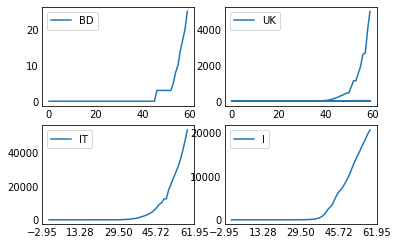

In [85]:
fig = plt.figure() 
# defining subplots 
ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222) 
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224) 

# Plot Bangladesh 
ax1.plot(df_bd['Days'],df_bd['ConfirmedCases'], label='BD')
ax1.tick_params(axis ='both', which ='both', length = 0) 
ax1.legend(['BD'])

# Plot UK 
ax2.plot(df_uk['Days'],df_uk['ConfirmedCases'], label='UK')
ax2.tick_params(axis ='both', which ='both', length = 0) 
ax2.legend(['UK'])

# Plot Italy
ax3.plot(df_it['Days'],df_it['ConfirmedCases'], label='IT')
ax3.tick_params(axis ='both', which ='both', length = 0) 
xmin, xmax = ax3.get_xlim()
ax3.set_xticks(np.round(np.linspace(xmin, xmax, 5), 2))
ax3.legend(['IT'])

# Plot Iran
ax4.plot(df_iran['Days'],df_iran['ConfirmedCases'], label='IRAN')
ax4.tick_params(axis ='both', which ='both', length = 0) 
xmin, xmax = ax4.get_xlim()
ax4.set_xticks(np.round(np.linspace(xmin, xmax, 5), 2))
ax4.legend('IR')




In [32]:
train['Date'].min()
train['Date'].max()

'2020-03-21'